## Loading the Required Libraries and the dataset

In [7]:
import numpy as np 
import pandas as pd                              # for data exploration
import matplotlib.pyplot as plt                  # for plotting the graphs
import seaborn as sns                            # for plotting the graphs
from numpy import quantile, where, random
from sklearn.neighbors import LocalOutlierFactor # Importing the Local Outlier Factor model from scikit learn library

Here are the versions of the libraries

In [8]:
print('numpy', np.__version__)
print('pandas', pd.__version__)
print('seaborn', sns.__version__)
print('matplotlib', plt.matplotlib.__version__)
print('scikit-learn',__import__('sklearn').__version__)

numpy 1.26.1
pandas 2.1.1
seaborn 0.13.0
matplotlib 3.8.0
scikit-learn 1.4.2


In [9]:
orbit_data = pd.read_csv("SMA_data.csv") # Loading the dataset using pandas 
orbit_data.head()                        # Print the first 5 rows of the dataset

Datetime          SMA
0  2018-01-01 04:34:10.320672  6864.691463
1  2018-01-01 12:37:36.596064  6864.689664
2  2018-01-01 20:31:55.898112  6864.688585
3  2018-01-02 05:42:49.014720  6864.684927
4  2018-01-02 12:13:01.263360  6864.682858

## Data Preprocessing

In [10]:
orbit_data.isnull().sum() # Checking for Null values in the dataset

Datetime    0
SMA         0
dtype: int64

>As we don't have any null values in the dataset we can now proceed to check the "Datetine" column.

In [11]:
print(orbit_data['Datetime'].dtype) # Checking if the "Datetime" column is in pandas DateTime format or not.

object


>As the values of the "Datetime" column are object type we have to convert it into pandas datetime format using the following code

In [12]:
orbit_data['Datetime'] = pd.to_datetime(orbit_data['Datetime'], errors='coerce') # Converting the "Datetime" column.

>Now there maybe some values in the 'Datetime' column which are not properly formated due to many reasons which may lead to errors plotting or modelling, we may check if any value is *'na'* or not. if any *'na'* is present then we have to remove that or fix that

In [13]:
invalid_dates = orbit_data['Datetime'].isna().sum()   # here the invalid_dates will be those data points where  'na' will be present in the 'Datetime' column. 

if invalid_dates > 0:
    print(f"There are {invalid_dates} invalid datetime entries in the 'DateTime' column.")
else:
    print("All entries in the 'DateTime' column are valid datetime entries.")

All entries in the 'DateTime' column are valid datetime entries.


> So we do not have any inconsistant values in the 'Datetime' column as the `invalid_dates = 0`

In [14]:
orbit_data['Datetime']

0      2018-01-01 04:34:10.320672
1      2018-01-01 12:37:36.596064
2      2018-01-01 20:31:55.898112
3      2018-01-02 05:42:49.014720
4      2018-01-02 12:13:01.263360
                  ...            
2286   2019-12-30 03:03:24.992640
2287   2019-12-30 11:05:46.768704
2288   2019-12-30 19:01:25.464576
2289   2019-12-31 10:44:01.110912
2290   2019-12-31 18:43:37.271136
Name: Datetime, Length: 2291, dtype: datetime64[ns]

## Feature Extraction & Exploratory Data Analysis

In [15]:
orbit_data['Year'] = orbit_data['Datetime'].dt.year             ## Extracting the Years from the 'Datetime' Column
orbit_data['Month'] = orbit_data['Datetime'].dt.month           ## Extracting the Months from the 'Datetime' Column
orbit_data['Day'] = orbit_data['Datetime'].dt.day               ## Extracting the Days from the 'Datetime' Column
orbit_data['Hour'] = orbit_data['Datetime'].dt.hour             ## Extracting the Hours from the 'Datetime' Column
orbit_data['DayOfWeek'] = orbit_data['Datetime'].dt.dayofweek   ## Extracting the Days of the Week from the 'Datetime' Column
orbit_data['DayOfYear'] = orbit_data['Datetime'].dt.dayofyear   ## Extracting the Days of the Year from the 'Datetime' Column
orbit_data.head()

Datetime          SMA  Year  Month  Day  Hour  DayOfWeek  \
0 2018-01-01 04:34:10.320672  6864.691463  2018      1    1     4          0   
1 2018-01-01 12:37:36.596064  6864.689664  2018      1    1    12          0   
2 2018-01-01 20:31:55.898112  6864.688585  2018      1    1    20          0   
3 2018-01-02 05:42:49.014720  6864.684927  2018      1    2     5          1   
4 2018-01-02 12:13:01.263360  6864.682858  2018      1    2    12          1   

   DayOfYear  
0          1  
1          1  
2          1  
3          2  
4          2

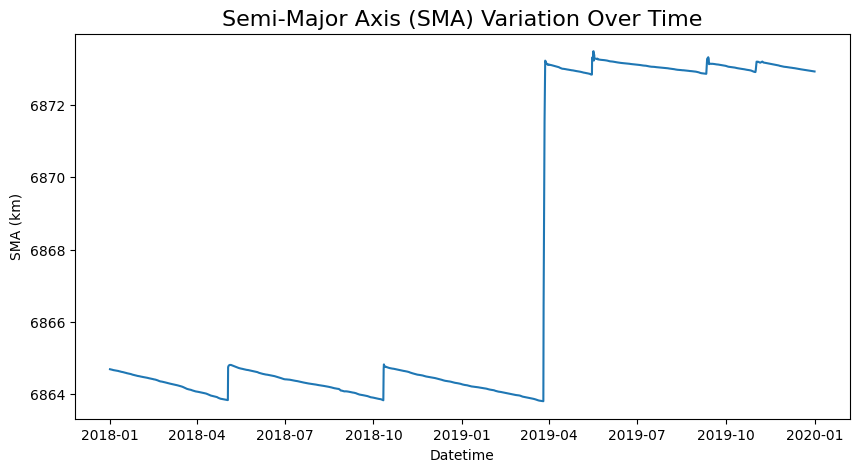

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(orbit_data['Datetime'], orbit_data['SMA'])
plt.xlabel('Datetime')
plt.ylabel('SMA (km)')
plt.title('Semi-Major Axis (SMA) Variation Over Time',fontsize=16)
plt.show()

### **Analysis of the Graph**

1. **Time Period:**
The graph spans from January 2018 to January 2020.

2. **Overall Trend:**
There are distinct sections in the graph where the SMA remains relatively constant for a period and then changes abruptly. This indicates periods of stable orbit followed by sudden changes.

3. **Stable Periods:**
From January 2018 to around April 2019, the SMA continues to decrease with occasional minor jumps.
From April 2019 to the end of the graph in January 2020, the SMA remains relatively stable with minor fluctuations.

4. **Sudden Changes:**
There are significant jumps in the SMA value around:
April 2019

5. **Pattern:**
The SMA decreases gradually over time and then shows sudden increases. This pattern suggests that there might be maneuvers or adjustments to the orbit that cause these abrupt changes.

> Plot the SMA for each year

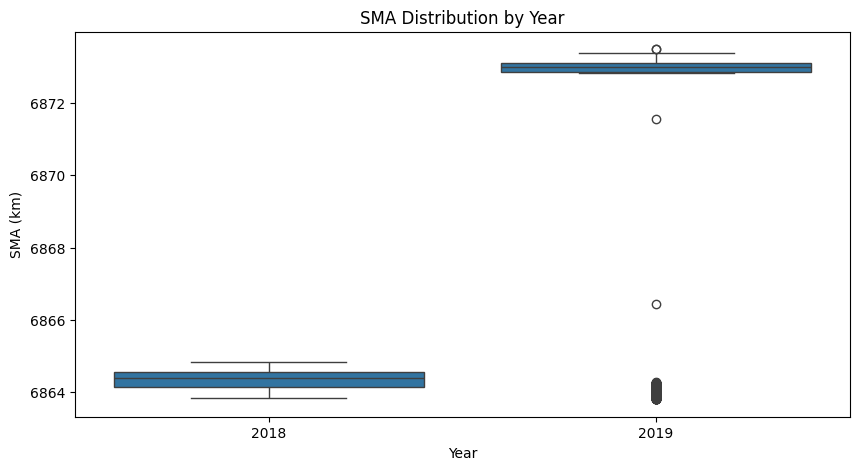

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Year', y='SMA', data=orbit_data)
plt.xlabel('Year')
plt.ylabel('SMA (km)')
plt.title('SMA Distribution by Year')
plt.show()

### **Analysis of the Graph**

1. **2018:**
The median SMA value is around 6864 km.
The SMA values in 2018 are tightly clustered with a relatively small interquartile range (IQR), indicating low variability.
There are no significant outliers in the 2018 data.

2. **2019:**
The median SMA value is around 6872 km, which is significantly higher than in 2018.
The IQR is smaller compared to 2018, indicating lower variability in SMA values.
There are several outliers below the lower quartile and above the upper quartile. These outliers might indicate maneuvers in the satellite's orbit.

> Plot the SMA for each month

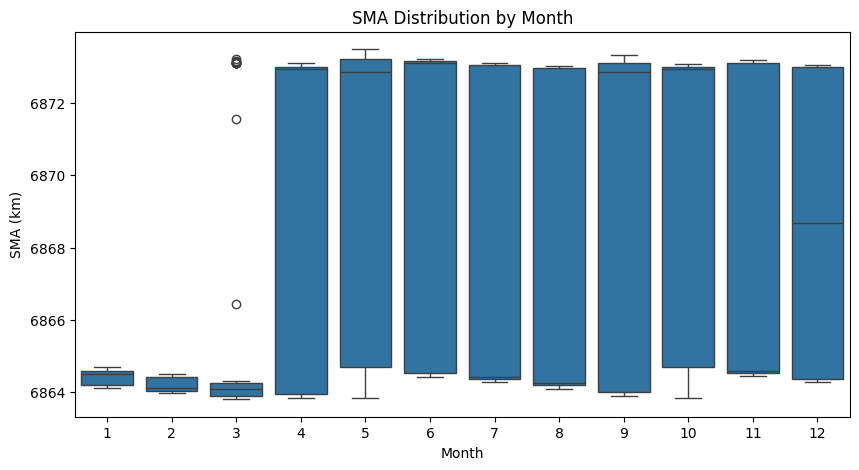

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='SMA', data=orbit_data)
plt.xlabel('Month')
plt.ylabel('SMA (km)')
plt.title('SMA Distribution by Month')
plt.show()

### **Analysis of the Graph**

1. **January to March:**

The SMA values are around 6864 km, with very little variability and no significant outliers.
April to December:

2. **April to December:**
The SMA values increase significantly starting from April, with the median values consistently around 6871 km.
Higher variability is observed from April onwards, as indicated by the larger IQR.
Several outliers are present, especially in April and May, suggesting possible orbital maneuvers or anomalies.

> Plot the SMA for each day of the week

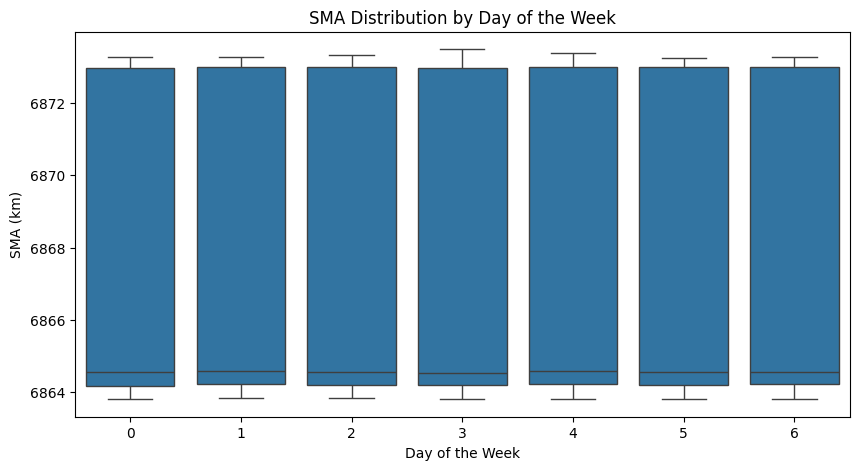

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='DayOfWeek', y='SMA', data=orbit_data)
plt.xlabel('Day of the Week')
plt.ylabel('SMA (km)')
plt.title('SMA Distribution by Day of the Week')
plt.show()

### **Analysis of the Graph**

The above graph shows that there is not such difference in the SMA distributions by Day of the week.

> Plot the SMA for each hour

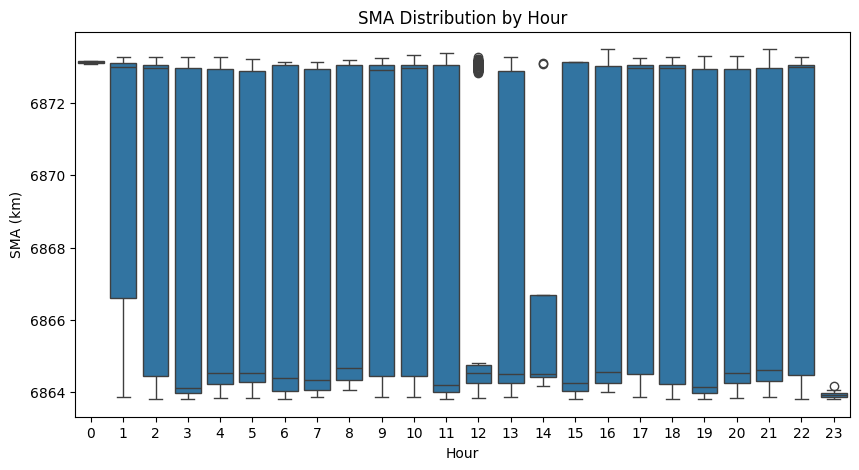

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Hour', y='SMA', data=orbit_data)
plt.xlabel('Hour')
plt.ylabel('SMA (km)')
plt.title('SMA Distribution by Hour')
plt.show()

### **Analysis of the Graph**

The above graph shows that most of the outliers are occuring at a certain time of each day. We can assume that most of the Manuvers are occuring at that time.

##  Manuver Detection in Satellite Orbit Data

Machine learning models, such as the Local Outlier Factor (LOF), can effectively detect anomalies in complex datasets. These models are capable of identifying non-linear patterns and subtle deviations that heuristic methods might miss. Given the challenge of detecting maneuvers like engine burns or orientation adjustments using only the semi-major axis (SMA) variation, ML models are better suited for this task because of their ability to learn from the data and generalize better.

1. Machine Learning Approaches
    - Local Outlier Factor

## Local Outlier Factor

Local Outlier Factor (LOF) is an unsupervised anomaly detection method that measures the local density deviation of a given data point with respect to its neighbors. Points that have a significantly lower density than their neighbors are considered outliers.

In [21]:
lof = LocalOutlierFactor(n_neighbors=40, contamination=0.0049) # best value --> 0.0049     # Contamination and n_neighbors are just the threshold and the number of neighbors to use for computing the local density score. These are hyper parameters
orbit_data['anomaly_lof'] = lof.fit_predict(orbit_data[['SMA']])
orbit_data['anomaly_lof'] = orbit_data['anomaly_lof'].apply(lambda x: 1 if x == -1 else 0)

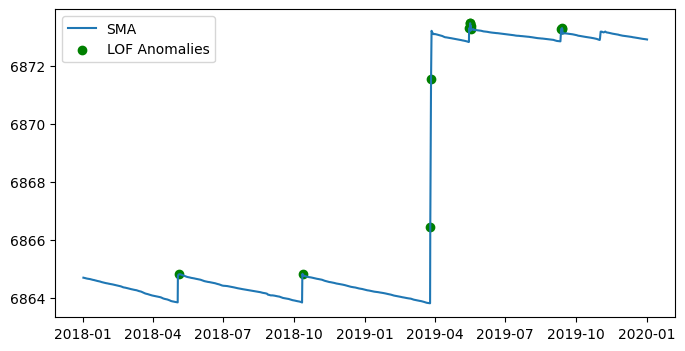

In [22]:
plt.figure(figsize=(8,4))
plt.plot(orbit_data['Datetime'], orbit_data['SMA'], label='SMA')
plt.scatter(orbit_data[orbit_data['anomaly_lof'] == 1]['Datetime'], orbit_data[orbit_data['anomaly_lof'] == 1]['SMA'], color='green', label='LOF Anomalies')
plt.legend()
plt.show()

In [24]:
len(orbit_data[orbit_data['anomaly_lof'] == 1])

12

So there are 12 Anomalies/Manuvers detected in the orbit_data

Plotting the 12 Dates (along with 5 before and after that point) to check the model performance

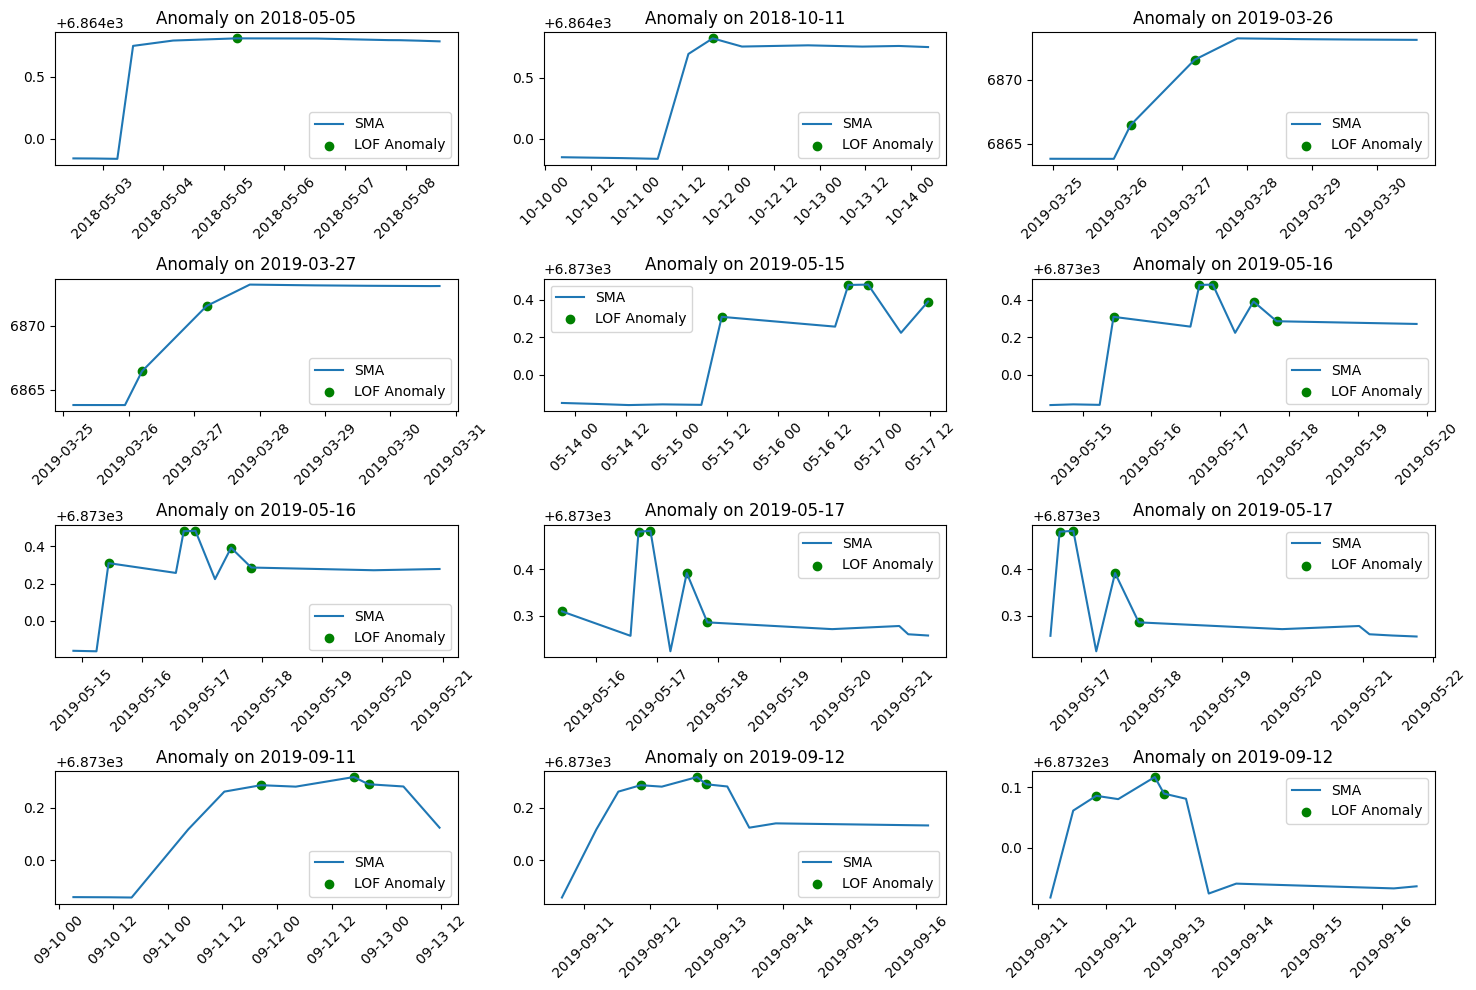

In [23]:
anomaly_dates_lof = orbit_data[orbit_data['anomaly_lof'] == 1]['Datetime']

fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterate through each anomaly date and plot the surrounding data points for LOF
for idx, anomaly_date in enumerate(anomaly_dates_lof):
    if idx >= 12:  # Limit to 12 plots (4x3 matrix) as for contamination = 0.0049 we are getting 12 anomaly points
        break
    
    anomaly_index = orbit_data[orbit_data['Datetime'] == anomaly_date].index[0]
    
    # Let's Define the range around the anomaly date (5 points before and 5 points after)
    start_index = max(0, anomaly_index - 5)
    end_index = min(len(orbit_data), anomaly_index + 6)  # end_index is exclusive
    
    # Select the subset of data
    subset_data = orbit_data.iloc[start_index:end_index]
    
    # Plot on the corresponding subplot
    ax = axes[idx]
    ax.plot(subset_data['Datetime'], subset_data['SMA'], label='SMA')
    ax.scatter(subset_data[subset_data['anomaly_lof'] == 1]['Datetime'], subset_data[subset_data['anomaly_lof'] == 1]['SMA'], color='green', label='LOF Anomaly')
    ax.set_title(f'Anomaly on {anomaly_date.date()}')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Conclusion : 

Based on the above machine learning approache to find the anomaly in the SMA Data we can conclude that although Local Outlier Factor is  able to find the required Anomalies/Manuvers in the orbit data but still it ignored 2 data points which were supposed to be Manuvers and also flagged multiple normal data points as anomaly (False Positive).

## Future Work

Although  `Local Outlier Factor` is able to detect outliers, their performance is not optimal based on the provided reference diagram. To improve anomaly detection, we can explore alternative techniques such as `Autoencoders`, `LSTM`, and clustering algorithms like `K-Means Clustering`. Additionally, expanding the dataset to include data from more years may enhance the ability to identify anomalies more effectively. `Hyper Parameter Tuning` can also be used for getting the optimum heper parameter values of the models (`n_neighbors`, `contamination`) for better training.